In [170]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report
from math import sqrt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import explained_variance_score,max_error,r2_score
import matplotlib.pyplot as plt
import xlrd
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import cross_val_score
######svc gia binary problepseis svr gia synexeis problepseis


In [54]:
# Load dataset
df=pd.read_excel(r'C:\Users\User\Desktop\ML ILIA\asthma_severity.xls')
df.head()## βγαζει τα 5 πρωτα στοιχεια του πινακα

df['Asthma'] = df['Asthma'].replace([2],1) #----> παω στην στηλη "ασθμα" και αλλαζω τα 2αρια με ασσους
df["sex"]=df['sex'].replace(["F"],1)#---->παω στην στηλη σεξ και αλλαζω τα θηλυκα και τα αρσενικα αππο κατω με 0 κ 1 αντιστοιχα
df["sex"]=df['sex'].replace(["M"],0)
df.astype(float)#----> μετατρεπω ολο τον πινακα σε float δλδ αριθμοσ με υποδιαστολη πχ 1.83 2.54 3.00 για να ειναι ολα τα δεδομενα το ιδιο

,α/α,ht,wt,sex,FVCn,FEV1n,PEFn,FEF50%n,FVCp,FEV1p,...,FVCp%,FEV1p%,PEFp%,FEF50%p%,FVCm%,FEV1m%,PEFm%,FEF50%m%,Reversibility,Asthma
0,1.0,155.0,60.0,1.0,3.10,2.65,5.1,3.8,2.48,1.53,...,80.0,58.0,67.0,26.0,96.0,90.0,80.0,36.0,20.000000,1.0
1,2.0,141.0,55.0,0.0,2.53,2.12,4.8,3.5,1.62,1.07,...,64.0,50.0,54.0,20.0,71.0,88.0,64.0,22.0,10.937500,1.0
2,3.0,139.0,38.0,0.0,2.43,2.04,4.6,3.4,2.01,1.46,...,83.0,72.0,74.0,38.0,100.0,84.0,82.0,44.0,20.481928,1.0
3,4.0,155.0,60.0,1.0,3.10,2.65,5.1,3.8,2.14,1.16,...,69.0,44.0,61.0,18.0,82.0,71.0,70.0,21.0,18.840580,1.0
4,5.0,120.0,30.0,0.0,1.63,1.37,3.0,2.3,1.21,1.04,...,74.0,76.0,97.0,43.0,82.0,93.0,98.0,78.0,10.810811,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,197.0,120.0,24.0,1.0,1.55,1.32,2.7,2.2,1.07,1.07,...,69.0,81.0,85.0,68.0,83.0,93.0,96.0,68.0,20.289855,1.0
196,198.0,120.0,25.0,1.0,1.55,1.32,2.7,2.2,1.42,1.40,...,92.0,106.0,115.0,105.0,99.0,126.0,118.0,113.0,7.608696,0.0
197,199.0,129.0,25.0,0.0,1.98,1.67,3.8,2.8,1.82,1.78,...,92.0,107.0,116.0,82.0,94.0,104.0,103.0,93.0,2.173913,0.0
198,200.0,128.0,32.0,1.0,1.84,1.57,3.3,2.6,1.50,1.44,...,82.0,92.0,88.0,81.0,98.0,104.0,133.0,77.0,19.512195,1.0


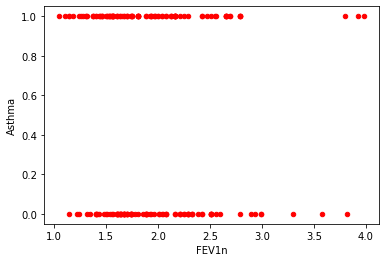

In [109]:
ax1 = df.plot.scatter(x='FEV1n', #vale edw opoia kathgoria thes n deis pws vgainei an k dn tha dwsei kati trelo apla krata thn entolh
                      y='Asthma',
                      c='red')


In [69]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.9, random_state=42)

In [216]:
model1 = DecisionTreeClassifier(random_state = 0)
clf1 = model1.fit(x_train,y_train)
model2 = RandomForestClassifier(max_depth=5, random_state=1)
clf2 = model2.fit(x_train,y_train)
#model3=SVR()
model4 = SVC(kernel='linear')
clf4 = model4.fit(x_train,y_train)
model3= GaussianProcessClassifier(random_state=0)
clf3 = model3.fit(x_train,y_train)
classifiers=[clf1,clf2,clf3,clf4]## kataxwrw se pinaka ta scores gia n mporw n perasw domh epanalhpsis apo katw kai n ta typwnw eukola
classifiers_regr=[clf1,clf2,clf3]

In [217]:
for clf in classifiers: #prospernw ola ta clf (clf1,clf2,clf3,clf4)
    clf.score(x_test, y_test)#synarthsh tou sklearn
    scores = cross_val_score(clf, x, y, cv=10)# 10 fold cross valid 
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.03)
Accuracy: 0.99 (+/- 0.04)
Accuracy: 0.61 (+/- 0.24)
Accuracy: 0.96 (+/- 0.09)


In [238]:
y1 = clf1.predict_proba(x_test)[:,1]
y2 = clf2.predict_proba(x_test)[:,1]
y3 = clf3.predict_proba(x_test)[:,1]
y4 = clf4.predict_proba(x_test)[:,1]

#y_pred_prob3 = clf3.predict(x_test)[:,1]
print(y1)

AttributeError: predict_proba is not available when  probability=False

In [219]:
for clf in classifiers_regr: #prospernw ola ta clf (clf1,clf2,clf3,clf4)   #profanws to prwto dld desicion tree tha vgainei gamato giati exei 2 values 0 k 1 dn proseggizei me pithanotita opws ta alla pou einai regr
    print (clf)
    clf.score(x_test, y_test)#synarthsh tou sklearn
    scores = cross_val_score(clf, x, y, cv=10)# 10 fold cross valid 
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Variance score is -> %0.2f" % explained_variance_score(y_test, clf.predict_proba(x_test)[:,1]) , "out of 1.0")
    print("max error is -> %0.2f" % max_error(y_test,  clf.predict_proba(x_test)[:,1]) , "and the best possible is 0.0")
    print("mean squared error is -> %0.2f" % mean_squared_error(y_test, clf.predict_proba(x_test)[:,1]) , "and the best possible is 0.0")
    print("R2 score -> %0.2f" % r2_score(y_test, clf.predict_proba(x_test)[:,1]) , "and the best possible is 1.0")
    print("-----------------------------------------------------------------------------------")

DecisionTreeClassifier(random_state=0)
Accuracy: 0.99 (+/- 0.03)
Variance score is -> 1.00 out of 1.0
max error is -> 0.00 and the best possible is 0.0
mean squared error is -> 0.00 and the best possible is 0.0
R2 score -> 1.00 and the best possible is 1.0
-----------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, random_state=1)
Accuracy: 0.99 (+/- 0.04)
Variance score is -> 0.79 out of 1.0
max error is -> 0.51 and the best possible is 0.0
mean squared error is -> 0.05 and the best possible is 0.0
R2 score -> 0.79 and the best possible is 1.0
-----------------------------------------------------------------------------------
GaussianProcessClassifier(random_state=0)
Accuracy: 0.61 (+/- 0.24)
Variance score is -> 0.01 out of 1.0
max error is -> 0.50 and the best possible is 0.0
mean squared error is -> 0.25 and the best possible is 0.0
R2 score -> 0.01 and the best possible is 1.0
---------------------------------------------

DecisionTreeClassifier(random_state=0)
RandomForestClassifier(max_depth=5, random_state=1)
GaussianProcessClassifier(random_state=0)


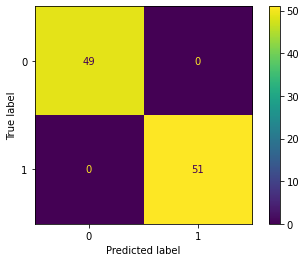

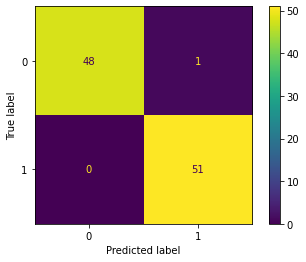

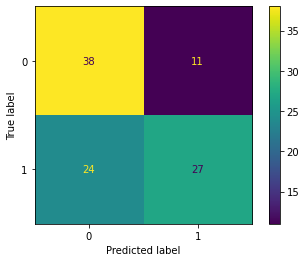

In [230]:
for clf in classifiers_regr: # o classifiers_regr exei mesa ton clf gia desiciontrees,randomforest,gaussian process antistoixa k kanw domh epanalhpsis gia n ta eksagw ola me tn mia
    
    print (clf)
    plot_confusion_matrix(clf, x_test, y_test)